In [4]:
import pandas as pd
import numpy 
import sklearn
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [22]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


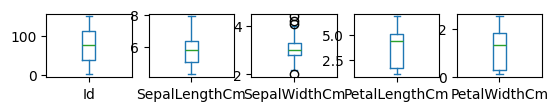

In [6]:
df.plot(kind='box', subplots=True, layout=(5,5), sharex= False, sharey= False)
plt.show()

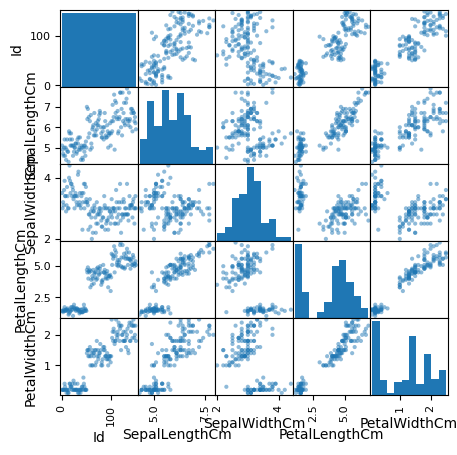

In [23]:


scatter_matrix(df, figsize=(5, 5), diagonal='hist', alpha=0.5)
plt.show()


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
print(df.shape)

(150, 6)


In [24]:
#checking for missing values
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Text(0, 0.5, 'SepalLengthCm')

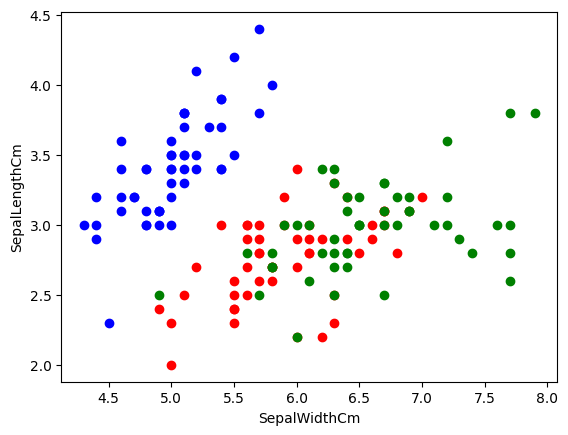

In [25]:
colours=['red','green','blue']
species=['Iris-versicolor', 'Iris-virginica','Iris-setosa' ]
for i in range(3):
    a=df[df['Species']==species[i]]
    plt.scatter(a['SepalLengthCm'],a['SepalWidthCm'], c=colours[i],label=species[i])
plt.xlabel("SepalWidthCm")
plt.ylabel("SepalLengthCm")


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
#removing unnecessary column 'ID' 
if 'Id' in df.columns:
    df=df.drop(columns='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
#lets divide the data
array=df.values
x=array[:,0:4]
y=array[:,4]
print(x,y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [16]:
seed=7
size=0.30
trainset_x,test_x, trainset_y, test_y=model_selection.train_test_split(x,y,test_size=size,random_state=seed)
print("Train X:\n", trainset_x)
print("Train Y:\n", trainset_y)
print("Test X:\n", test_x)
print("Test Y:\n", test_y)

Train X:
 [[5.0 3.3 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [6.0 2.2 4.0 1.0]
 [6.4 2.7 5.3 1.9]
 [4.7 3.2 1.6 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.4 1.5 0.2]
 [7.7 3.8 6.7 2.2]
 [4.3 3.0 1.1 0.1]
 [6.3 3.3 6.0 2.5]
 [5.5 2.4 3.7 1.0]
 [5.0 2.0 3.5 1.0]
 [6.5 2.8 4.6 1.5]
 [5.0 3.4 1.6 0.4]
 [4.4 2.9 1.4 0.2]
 [5.0 3.5 1.6 0.6]
 [6.7 3.1 4.7 1.5]
 [7.3 2.9 6.3 1.8]
 [5.5 2.6 4.4 1.2]
 [5.2 2.7 3.9 1.4]
 [5.7 4.4 1.5 0.4]
 [7.2 3.2 6.0 1.8]
 [5.4 3.4 1.7 0.2]
 [5.8 4.0 1.2 0.2]
 [6.1 2.6 5.6 1.4]
 [5.7 2.5 5.0 2.0]
 [4.8 3.0 1.4 0.1]
 [6.5 3.0 5.8 2.2]
 [4.6 3.2 1.4 0.2]
 [6.6 2.9 4.6 1.3]
 [6.7 3.0 5.2 2.3]
 [6.1 3.0 4.6 1.4]
 [5.7 3.8 1.7 0.3]
 [7.0 3.2 4.7 1.4]
 [4.7 3.2 1.3 0.2]
 [6.5 3.0 5.2 2.0]
 [7.7 2.6 6.9 2.3]
 [4.9 2.4 3.3 1.0]
 [4.8 3.1 1.6 0.2]
 [5.5 4.2 1.4 0.2]
 [5.6 3.0 4.1 1.3]
 [6.4 3.2 5.3 2.3]
 [5.2 3.5 1.5 0.2]
 [7.9 3.8 6.4 2.0]
 [5.8 2.8 5.1 2.4]
 [5.7 2.9 4.2 1.3]
 [5.1 3.7 1.5 0.4]
 [5.1 2.5 3.0 1.1]
 [5.0 3.4 1.5 0.2]
 [7.7 2.8 6.7 2.0]
 [7.6 3.0 6.6 2.1]
 [5.0 3.2 1.2 0.2]
 [

In [28]:
models={"Logistic Regression":LogisticRegression(),"K-Neighbors":KNeighborsClassifier(n_neighbors=5),"SVM": SVC(),"Decision Tree": DecisionTreeClassifier(),"Random Forest":RandomForestClassifier(n_estimators=100),"LDA":LinearDiscriminantAnalysis()}
print(models)

{'Logistic Regression': LogisticRegression(), 'K-Neighbors': KNeighborsClassifier(), 'SVM': SVC(), 'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier(), 'LDA': LinearDiscriminantAnalysis()}


In [29]:
#training
accuracy={}
for name,model in models.items():
    model.fit(trainset_x,trainset_y)
    y_ans=model.predict(test_x)
    accurate=accuracy_score(test_y,y_ans)
    accuracy[name]=accurate
    print(f"{name} Accuracy:{accurate:.4f}")
    

Logistic Regression Accuracy:0.9111
K-Neighbors Accuracy:0.9111
SVM Accuracy:0.8889
Decision Tree Accuracy:0.8889
Random Forest Accuracy:0.9111
LDA Accuracy:0.9778


C:\Users\DELL\AppData\Local\Temp\ipykernel_26564\3423909202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette="magma")


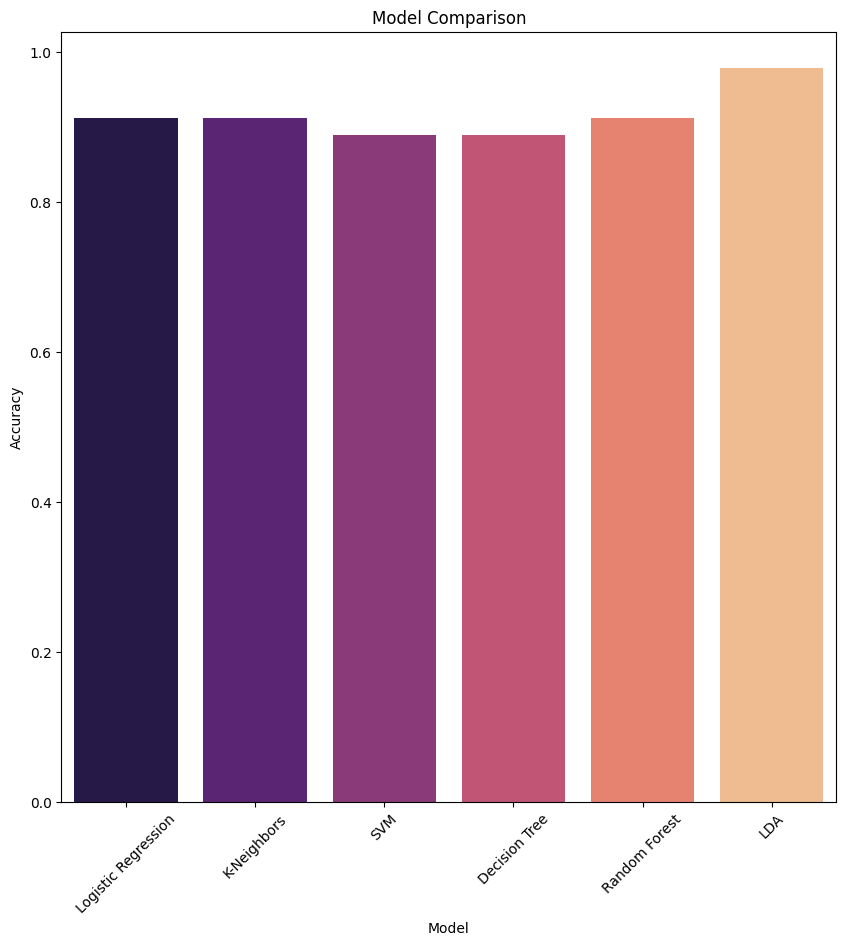

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette="magma")
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

In [31]:
#choose the best model
best=max(accuracy,key=accuracy.get)
print(best,":", accuracy[best])

LDA : 0.9777777777777777


In [32]:
best_model=models[best]
new=numpy.array([[5.1,3.5,1.4,0.2]])

answer=best_model.predict(new)
print(answer)

['Iris-setosa']


In [18]:
#the model is trained